***Import necessary libraries***

In [211]:
import pandas as pd 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


***Reading and storing the data***

In [212]:
df = pd.read_csv("Mall_Customers.csv")
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [213]:
df.shape

(200, 5)

In [214]:
df.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [215]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

***Extracting specific columns from the Data***

In [216]:
sample_data = df[["Annual Income (k$)","Spending Score (1-100)"]]
sample_data_df = pd.DataFrame(sample_data)
print(sample_data)

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


***Generate descriptive statistics of the sample_data DataFrame***

In [217]:
sample_data.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


***converting a pandas DataFrame into a NumPy array***

In [218]:
data = sample_data_df.values

***finding wcss value for different number of clusters***

In [219]:

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(sample_data)

  wcss.append(kmeans.inertia_)

***ploting an elbow graph***

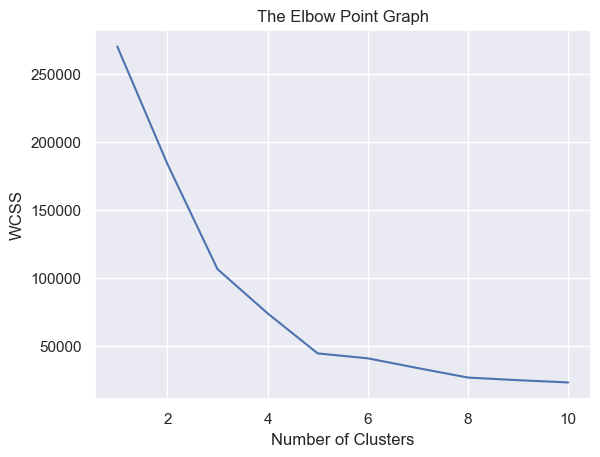

In [220]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

***Optimum Number of Clusters = 5***

***Training the k-Means Clustering Model***

In [221]:
# Applying KMeans
kmeans_5 = KMeans(n_clusters=5, init='k-means++', random_state=42)
cluster_pred = kmeans_5.fit_predict(data)

***Visualizing all the Clusters***

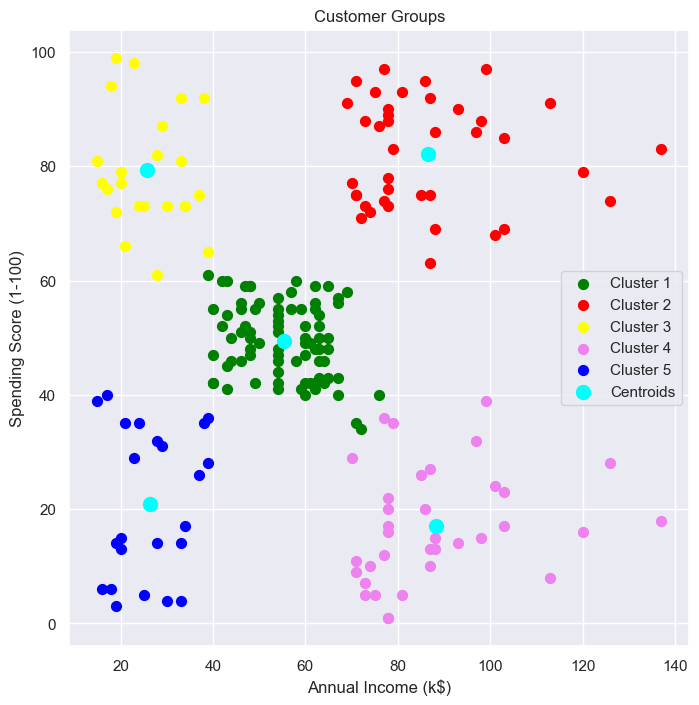

In [222]:
# plotting all the clusters and their Centroids
plt.figure(figsize=(8, 8))
plt.scatter(data[cluster_pred == 0, 0], data[cluster_pred == 0, 1], s=50, c='green', label='Cluster 1')
plt.scatter(data[cluster_pred == 1, 0], data[cluster_pred == 1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(data[cluster_pred == 2, 0], data[cluster_pred == 2, 1], s=50, c='yellow', label='Cluster 3')
plt.scatter(data[cluster_pred == 3, 0], data[cluster_pred == 3, 1], s=50, c='violet', label='Cluster 4')
plt.scatter(data[cluster_pred == 4, 0], data[cluster_pred == 4, 1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans_5.cluster_centers_[:, 0], kmeans_5.cluster_centers_[:, 1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()